# Task Summary
Follwing is the EDA for a public hosted database for college soccer in US.
https://www.kaggle.com/jeffgallini/college-football-team-stats-2019/data#

I have tried to find correlations within the training dataset, most influential features for winning the game.
We have done some statistical analysis as well as augmented them with plots and visualized them.


In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('CFB2019.csv')

In [133]:
df #Initial structure of the data

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,29:59,3,11,17,28,4,6,10,18,1.38
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,...,31:19,7,10,14,24,3,6,9,15,1.07
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,...,27:24,89,4,11,15,6,12,18,-3,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,West Virginia (Big 12),12,5-7,119,788,3863,4.90,28,321.9,74,...,28:21,103,6,8,14,5,15,20,-6,-0.50
126,Western Ky. (C-USA),13,9-4,84,900,5041,5.60,38,387.8,24,...,32:00,100,4,11,15,9,12,21,-6,-0.46
127,Western Mich. (MAC),13,7-6,25,916,5794,6.33,56,445.7,87,...,30:21,19,9,13,22,6,8,14,8,0.62
128,Wisconsin (Big Ten),14,10-4,38,963,6065,6.30,56,433.2,4,...,35:37,61,10,12,22,17,5,22,0,0.00


##### we want to have win-loss column to be segregated in win and loss columns respectively.

In [134]:
new = df["Win-Loss"].str.split("-", n = 1, expand = True) #Preparing data for analysis

In [135]:
df["Win"]= new[0]

In [136]:
df["Loss"]= new[1]

In [137]:
df.drop(columns =["Win-Loss"], inplace = True)    

In [138]:
# describing stats of variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Games,130.0,12.784615,0.757235,12.00,12.0000,13.000,13.00,15.00
Off Rank,130.0,65.492308,37.675326,1.00,33.2500,65.500,97.75,130.00
Off Plays,130.0,885.953846,76.366300,717.00,841.0000,881.000,936.50,1080.00
Off Yards,130.0,5167.538462,953.227688,2918.00,4580.2500,5123.500,5712.75,8527.00
Off Yards/Play,130.0,5.801385,0.723159,4.02,5.3125,5.815,6.22,7.96
...,...,...,...,...,...,...,...,...
Fumbles Lost,130.0,8.200000,2.963342,2.00,6.0000,8.000,10.00,17.00
Interceptions Thrown.y,130.0,9.976923,3.652472,1.00,8.0000,10.000,12.00,20.00
Turnovers Lost,130.0,18.176923,4.584208,6.00,15.0000,18.000,21.00,30.00
Turnover Margin,130.0,0.323077,7.545434,-15.00,-5.0000,0.000,5.00,21.00


In [139]:
df.shape  #this represents shape of the df 130 rows and 147 columns.

(130, 147)

In [140]:
df.columns # column names 

Index(['Team', 'Games', 'Off Rank', 'Off Plays', 'Off Yards', 'Off Yards/Play',
       'Off TDs', 'Off Yards per Game', 'Def Rank', 'Def Plays',
       ...
       'Fumbles Recovered', 'Opponents Intercepted', 'Turnovers Gain',
       'Fumbles Lost', 'Interceptions Thrown.y', 'Turnovers Lost',
       'Turnover Margin', 'Avg Turnover Margin per Game', 'Win', 'Loss'],
      dtype='object', length=147)

In [141]:
df.info

<bound method DataFrame.info of                            Team  Games  Off Rank  Off Plays  Off Yards  \
0     Air Force (Mountain West)     13        51        881       5483   
1                   Akron (MAC)     12       130        725       2918   
2                 Alabama (SEC)     13         6        842       6640   
3    Appalachian St. (Sun Belt)     14        39        969       6064   
4              Arizona (Pac-12)     12        30        873       5281   
..                          ...    ...       ...        ...        ...   
125      West Virginia (Big 12)     12       119        788       3863   
126         Western Ky. (C-USA)     13        84        900       5041   
127         Western Mich. (MAC)     13        25        916       5794   
128         Wisconsin (Big Ten)     14        38        963       6065   
129     Wyoming (Mountain West)     13       106        831       4562   

     Off Yards/Play  Off TDs  Off Yards per Game  Def Rank  Def Plays  ...  \
0

In [142]:
df.dtypes
team = df['Team']

In [143]:
df[['Win']] = df[['Win']].apply(pd.to_numeric, errors='coerce')

In [144]:
cor = df.corr()

In [148]:
#Correlation with respect to Win variable and filtering out variables with less correlation.
columns = cor[cor["Win"]>0.75]['Win']
columns_list = columns.index
columns_list

Index(['Games', 'Off Yards', 'Off TDs', 'First Downs', 'Redzone Scores',
       'Touchdowns', 'PAT', 'Total Points', 'Points Per Game', 'Win'],
      dtype='object')

In [149]:
df1 = pd.DataFrame(df, columns=columns_list)

In [160]:
df2 = df1.drop('Games', axis= 1)
df2['Team'] = team

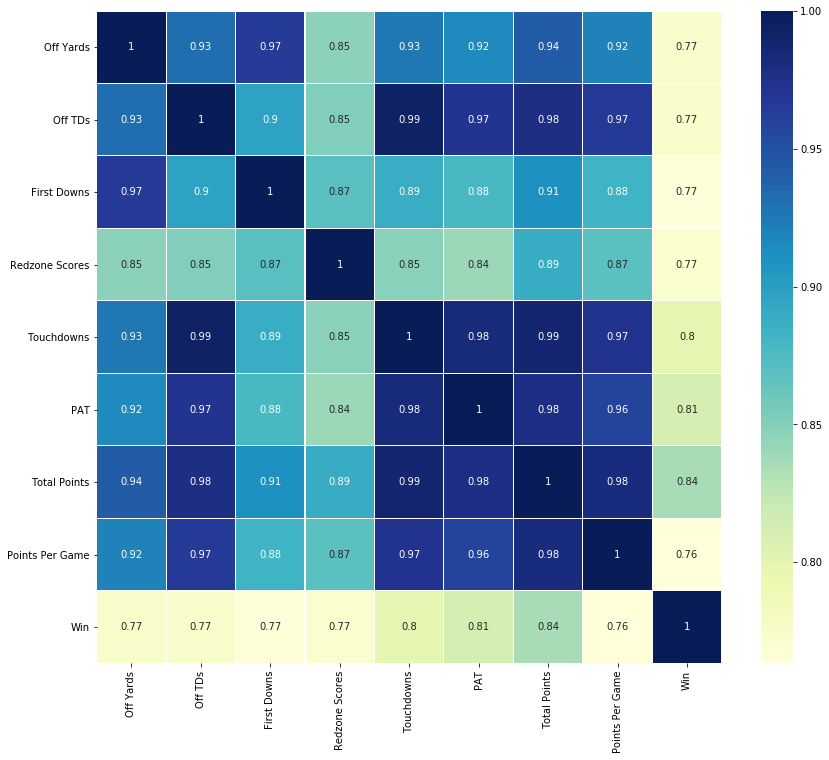

In [161]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))

sns.heatmap(df2.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

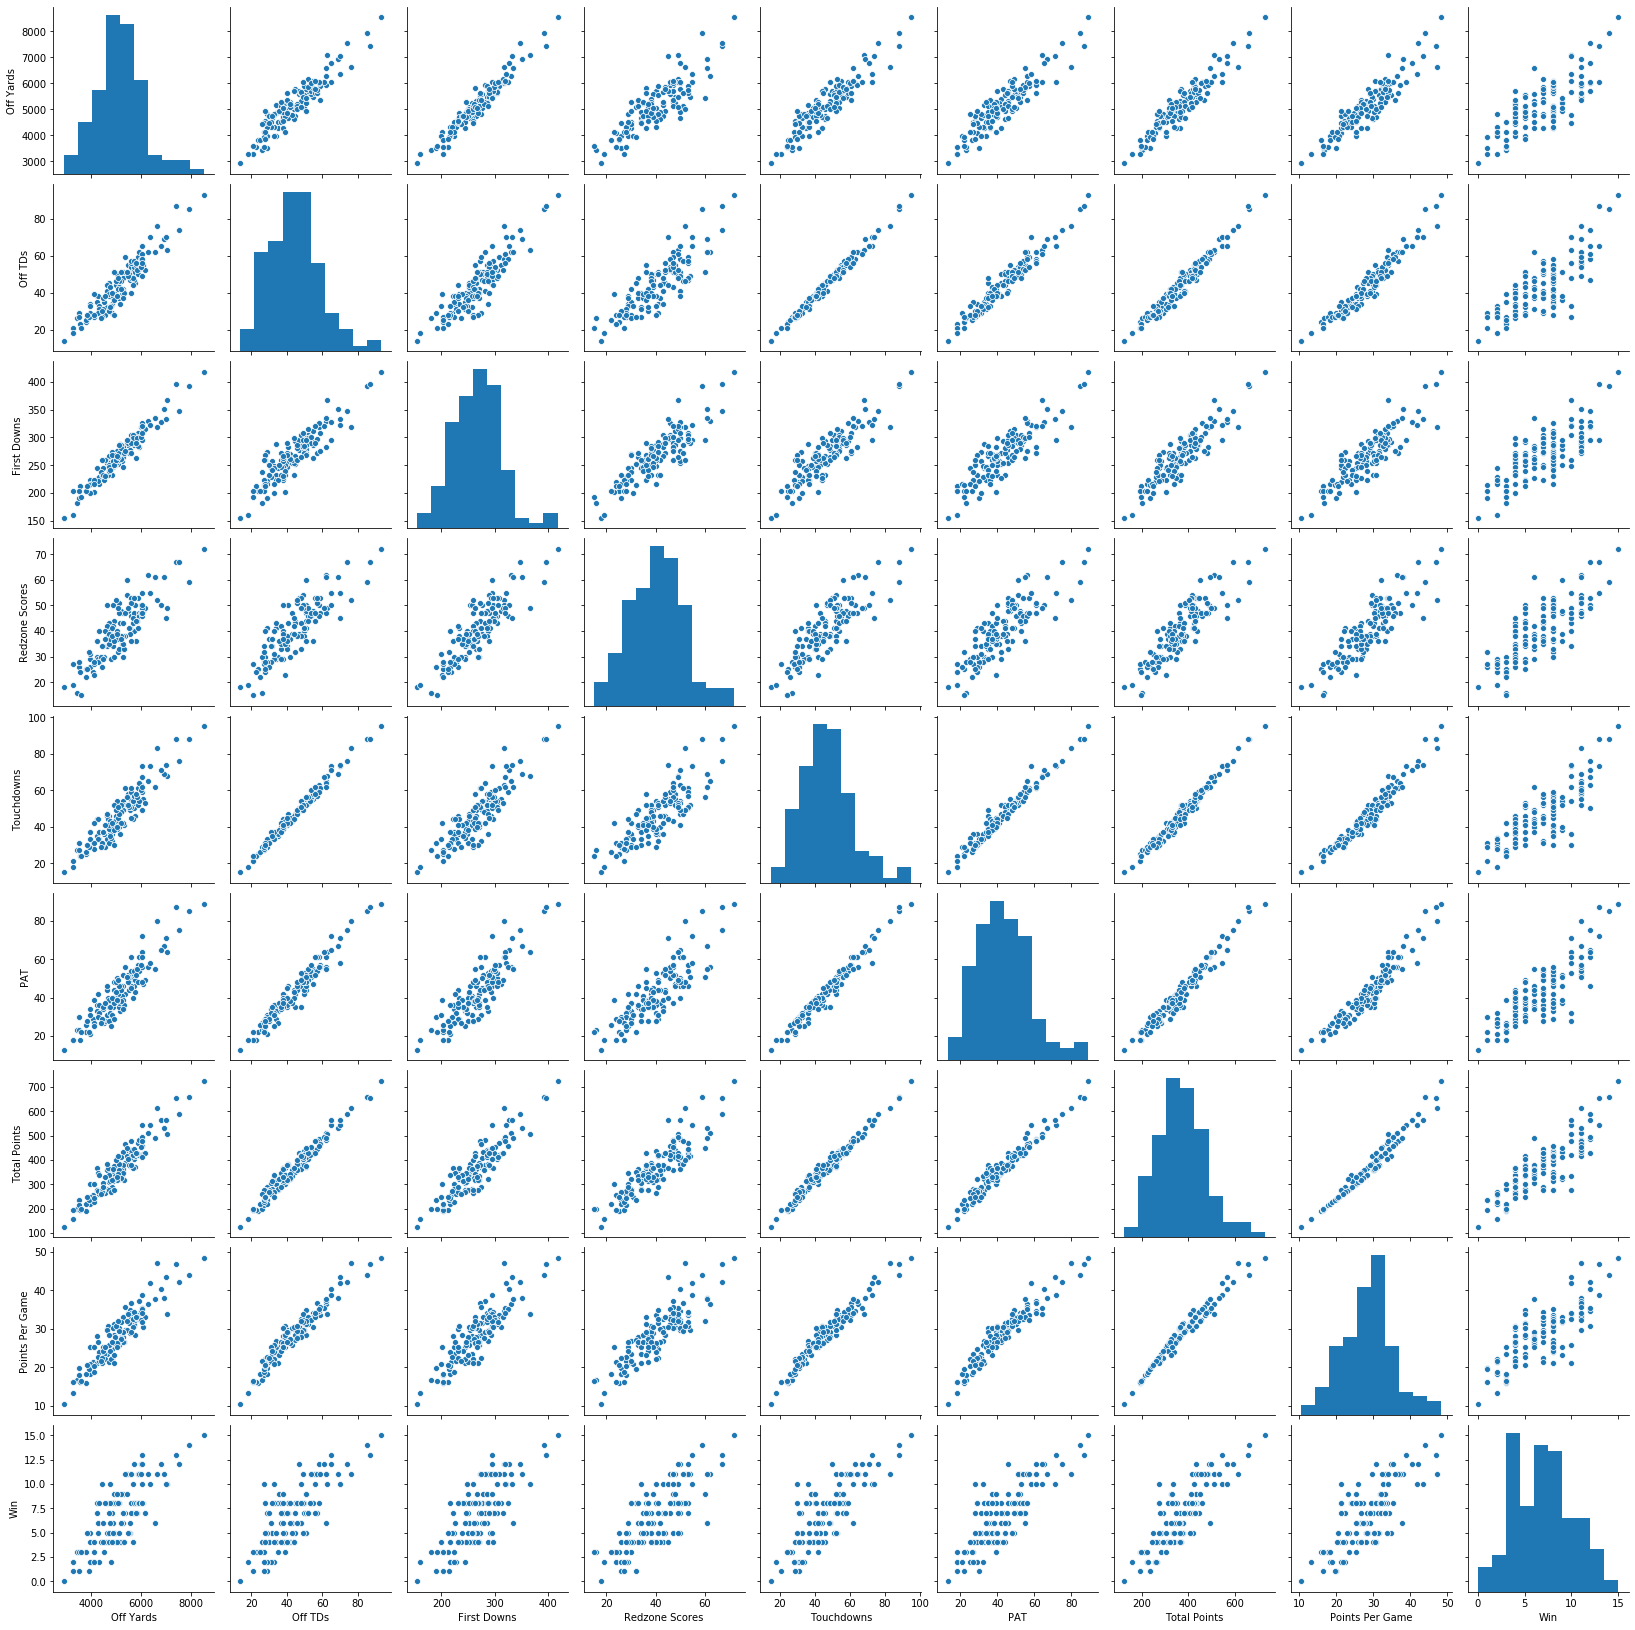

In [162]:
#pair plots
g = sns.pairplot(df2)

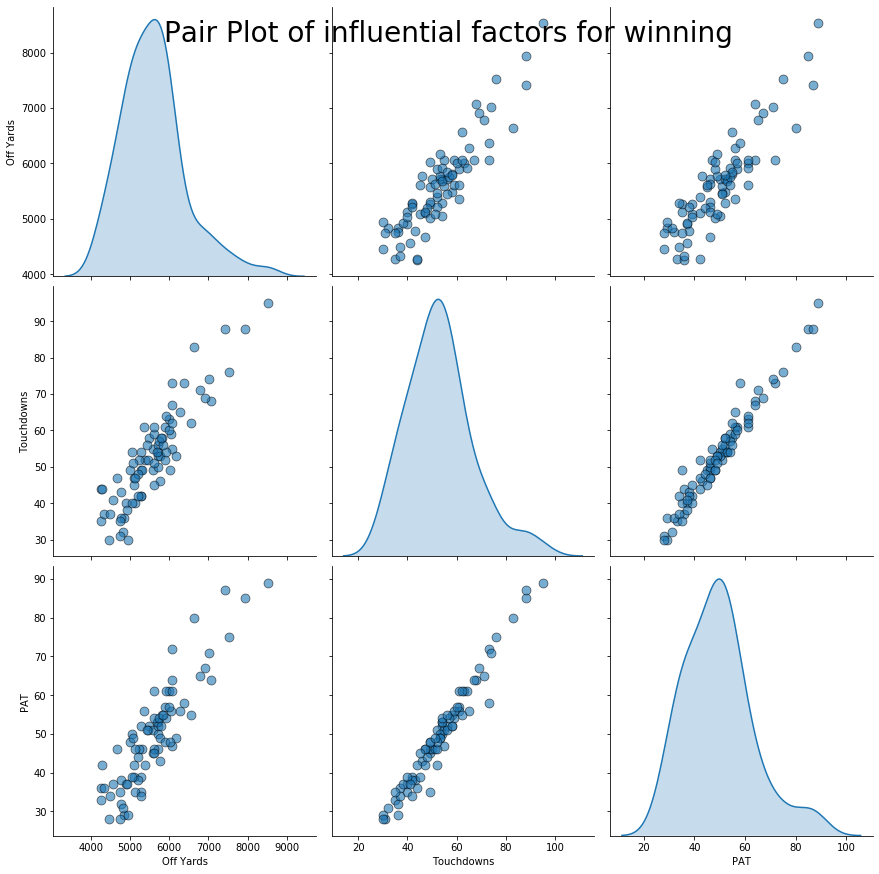

In [164]:
# Plot colored by continent for years 2000-2007
sns.pairplot(df2[df2['Win'] > 5], 
             vars = ['Off Yards', 'Touchdowns', 'PAT'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot of influential factors for winning', 
             size = 28);